# **Read CSV**

In [61]:
import numpy as np
import pandas as pd
import random

data = pd.read_csv('/content/dataset.csv',encoding='utf-8')
data_cols =['법정동','거래금액']
data = pd.DataFrame(data[data_cols])
data

,법정동,거래금액
0,대연동,11600
1,대연동,12000
2,대연동,13800
3,대연동,16700
4,대연동,18500
...,...,...
47197,대연동,20000
47198,대연동,14000
47199,용호동,27000
47200,문현동,49700


# **Data Preprocessing**

In [137]:
#data['거래일자'] = data['거래일자'].astype(str)
#ts_dates= pd.to_datetime(data['거래일자'])
#for i in range(len(data['거래일자'])):
#  data['거래일자'][i]= str(pd.Period(ts_dates[i],freq='Y'))

In [63]:
data_row =['법정동']
mean_data = data.groupby(data_row,as_index=False)['거래금액'].mean() # 법정동 , 거래일자 별로 평균금액


In [64]:
mean_data

,법정동,거래금액
0,감만동,14892.561917
1,대연동,30054.414907
2,문현동,23949.186877
3,용당동,23415.938316
4,용호동,35205.368591
5,우암동,17722.347845


In [123]:
a1 = [['서구','동구','영도구','부산진구','동래구','남구','북구','해운대구','사하구','금정구','연제구','수영구','사상구','기장군'],[58,57,72,57,55,55,57,57,63,57,57,54,59,64]]
b1 =[58,57,72,57,55,55,57,57,63,57,57,54,59,64]
new_data = pd.DataFrame(b1,index=['서구','동구','영도구','부산진구','동래구','남구','북구','해운대구','사하구','금정구','연제구','수영구','사상구','기장군'])
new_data1=new_data.transpose()
new_data

,0
서구,58
동구,57
영도구,72
부산진구,57
동래구,55
남구,55
북구,57
해운대구,57
사하구,63
금정구,57


# **OutPut**

In [17]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import folium
import json

In [75]:
# 법정동   위도.  경도

# 감만동   35.124030228261  129.08620464644
# 대연동.  35.134494315688  129.09990673514
# 문현동.  35.146341076458  129.0651370145
# 용당동.  35.123512978623  129.09778141447
# 용호동.  35.128252419753  129.10706272843 
# 우암동.  35.125038295407. 129.08183246108


In [134]:
geo_path = '/content/busan_gu.json'
geo_str = json.load(open(geo_path))

In [93]:
import requests
import json

r = requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/gadm/json/skorea-municipalities-geo.json')# 한국 구별 json
c = r.content
geo = json.loads(c)

In [136]:
map = folium.Map(location=[35.134494315688, 129.09990673514],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=11)

map.choropleth(geo_data = geo_str, 
               data = new_data[0],
              columns = [new_data.index,new_data[0]],
              fill_color = "PuRd",
              key_on = "feature.id")

              

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


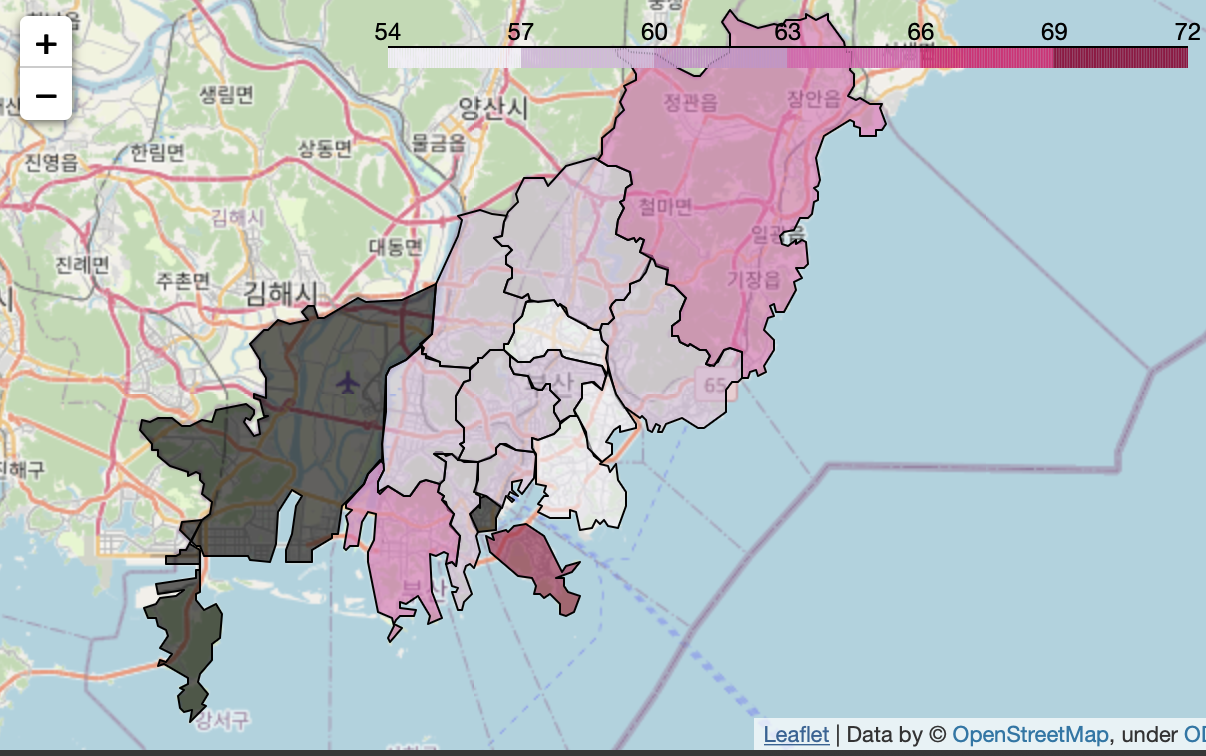